# Question D5

*Question*: How many years of experience do you have in developing ML-enabled systems?

*Answer Type*: Numerical

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In this research, we conservatively considered those who fully completed the survey. So, we discarded suspended submissions.

In [3]:
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['D6_ML_Experience'].head()

0    2
1    2
2    5
3    4
4    3
Name: D6_ML_Experience, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('-99','D6_ML_Experience')

In [6]:
# convert column to integer - if you read before this line, you will get an string like '14'
dataframe_obj.df = dataframe_obj.df.astype({"D6_ML_Experience": int}, errors='raise') 

In [7]:
# plot object for data
d6_plot = PlotUtils(pd.DataFrame(
    data={'ML Experience': list(dataframe_obj.df['D6_ML_Experience'])}
))

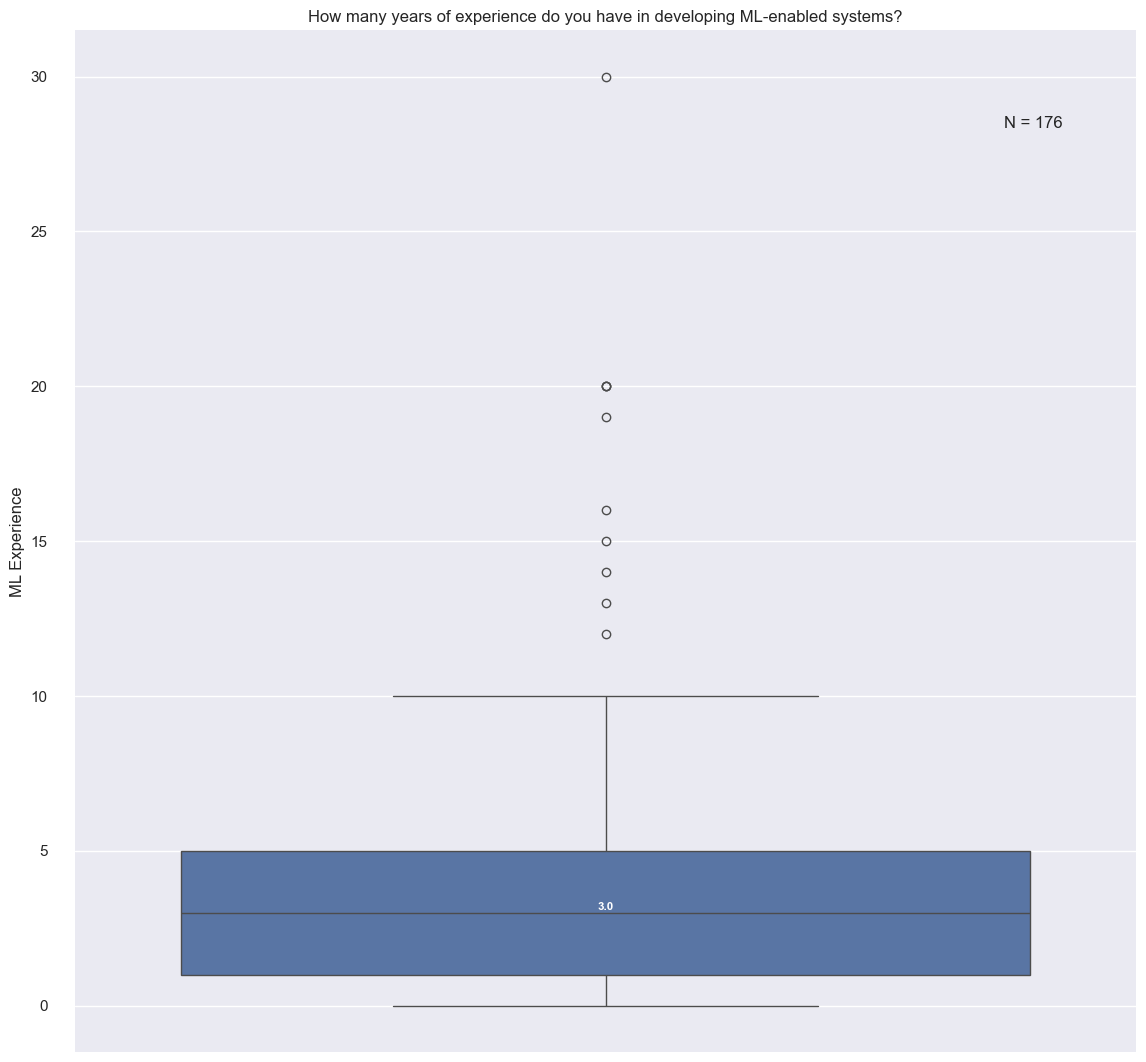

In [8]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D6_ML_Experience']))

d6_plot.single_boxplot("ML Experience",
                       title="How many years of experience do you have in developing ML-enabled systems?",
                       total_answers=total_answers)

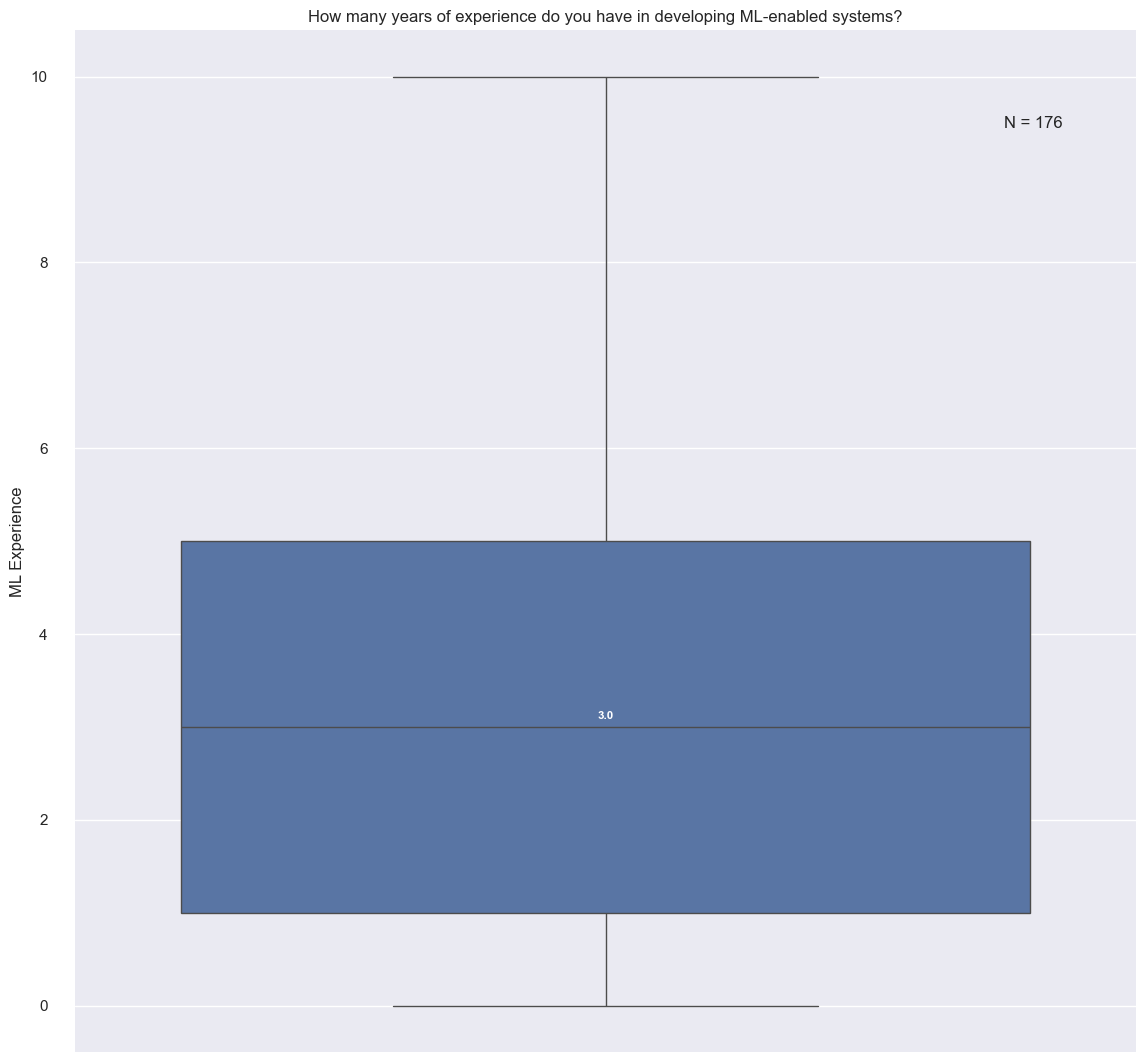

In [9]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D6_ML_Experience']))

d6_plot.single_boxplot("ML Experience", outliers=False,
                       title="How many years of experience do you have in developing ML-enabled systems?",
                       total_answers=total_answers)

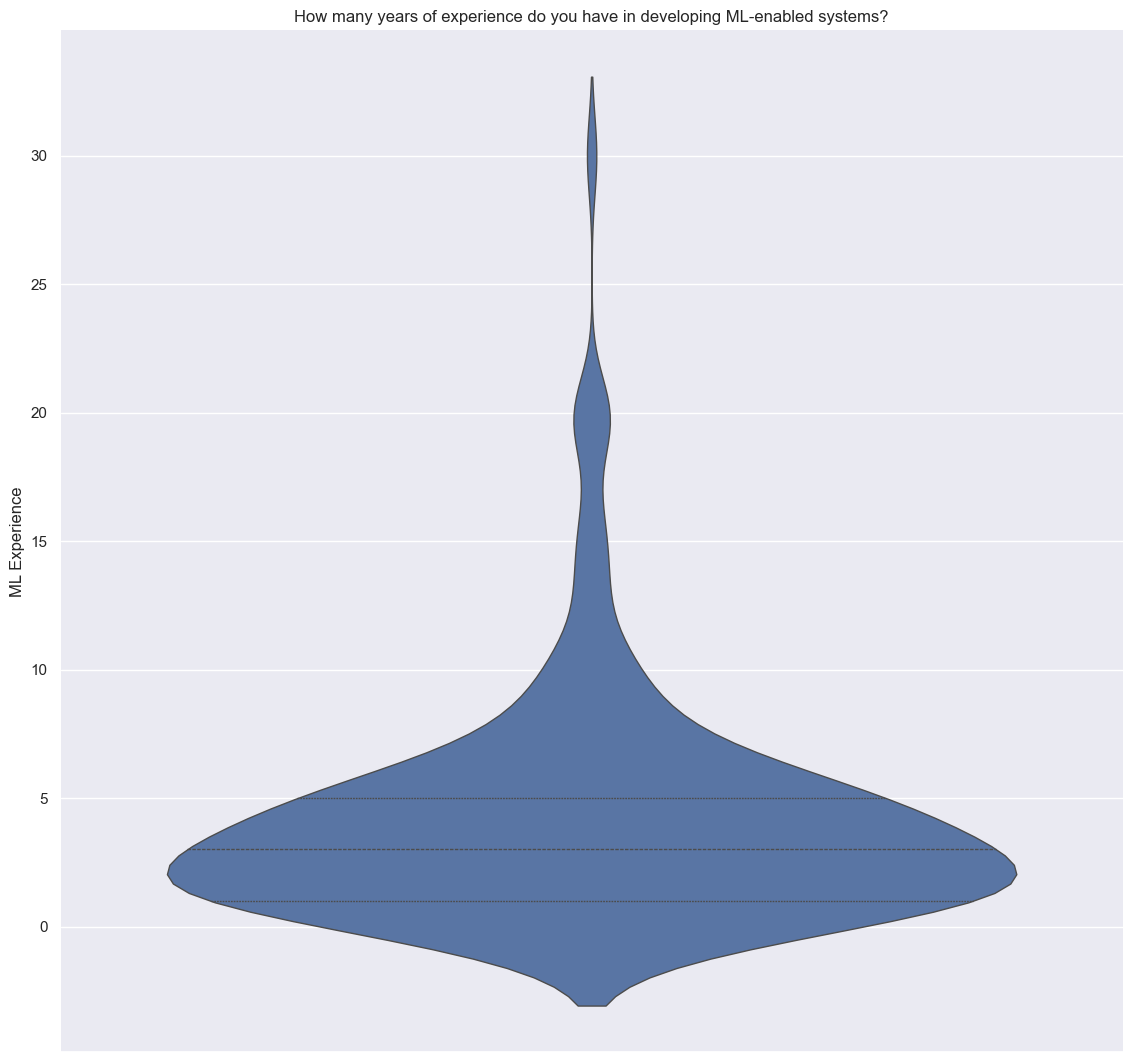

In [10]:
d6_plot.single_violinplot("ML Experience",
                          title="How many years of experience do you have in developing ML-enabled systems?")

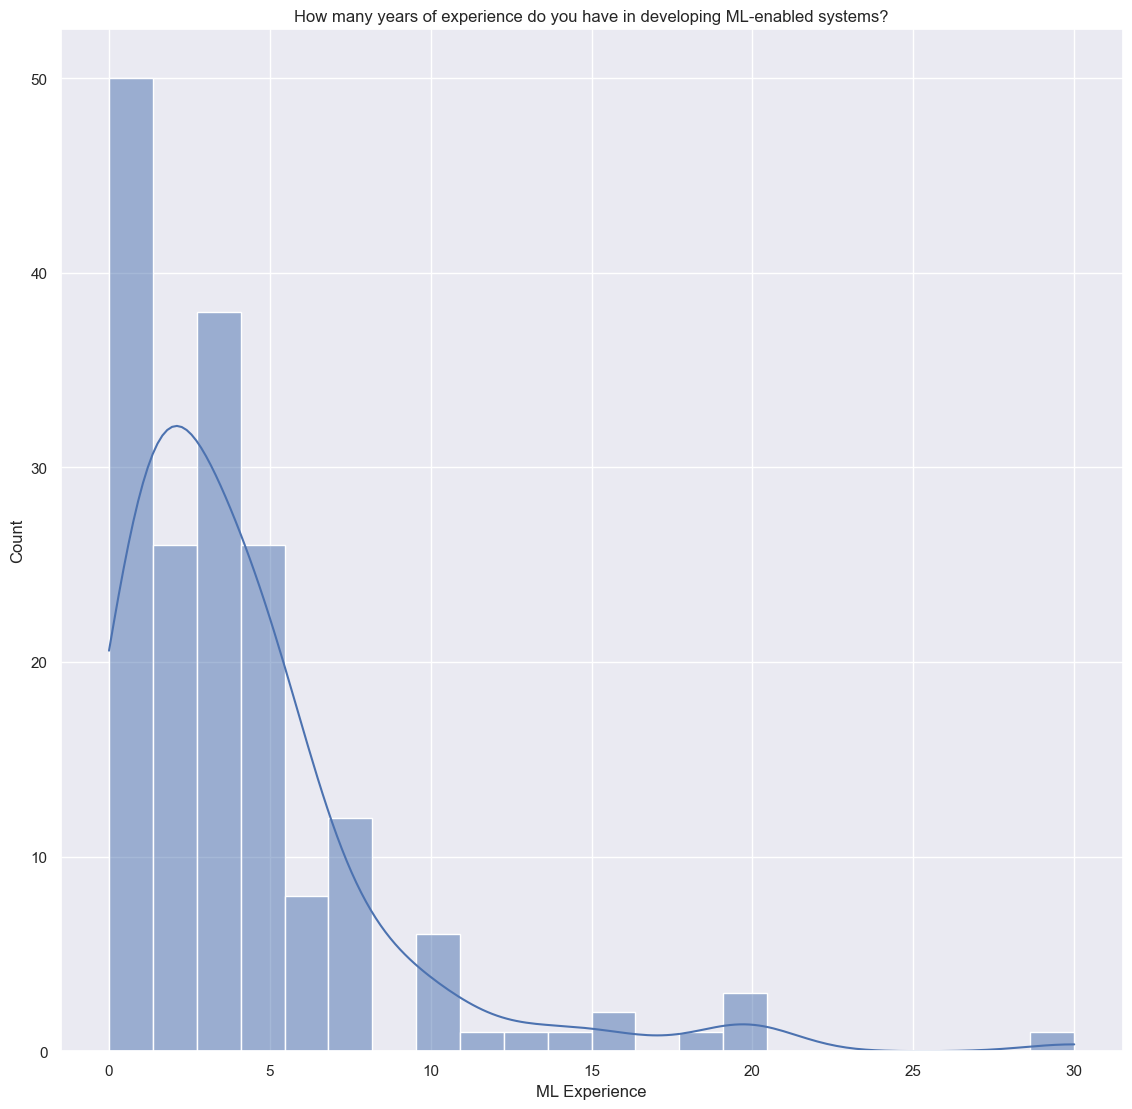

In [11]:
d6_plot.single_histplot("ML Experience",
                        title="How many years of experience do you have in developing ML-enabled systems?")

### Bootstrapping Analysis

In [12]:
valid_answers_list = list(dataframe_obj.df['D6_ML_Experience'])

total_answers_int = len(dataframe_obj.df['D6_ML_Experience'])

In [13]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [14]:
bootstrapped_list_data = bootstrapping_obj.bootstrapping_numerical_fields()

In [15]:
# plot object for bootstrapped data
d6_boot_plot = PlotUtils(pd.DataFrame(
    data={'ML Experience': bootstrapped_list_data['population']}
))

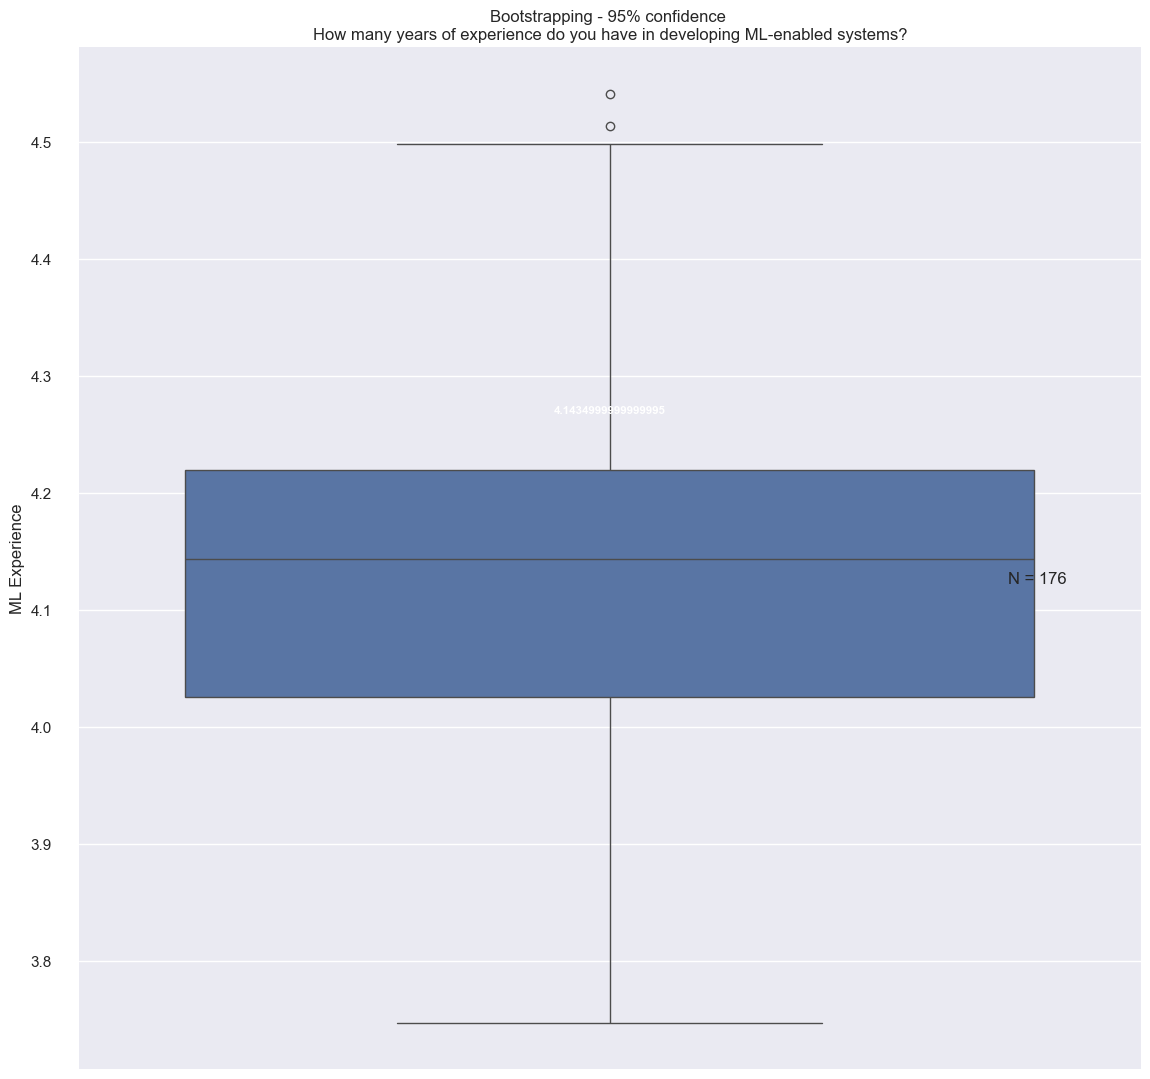

In [16]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D6_ML_Experience']))

d6_boot_plot.single_boxplot("ML Experience",
                            title="Bootstrapping - 95% confidence \nHow many years of experience do you have in developing ML-enabled systems?",
                            total_answers=total_answers)

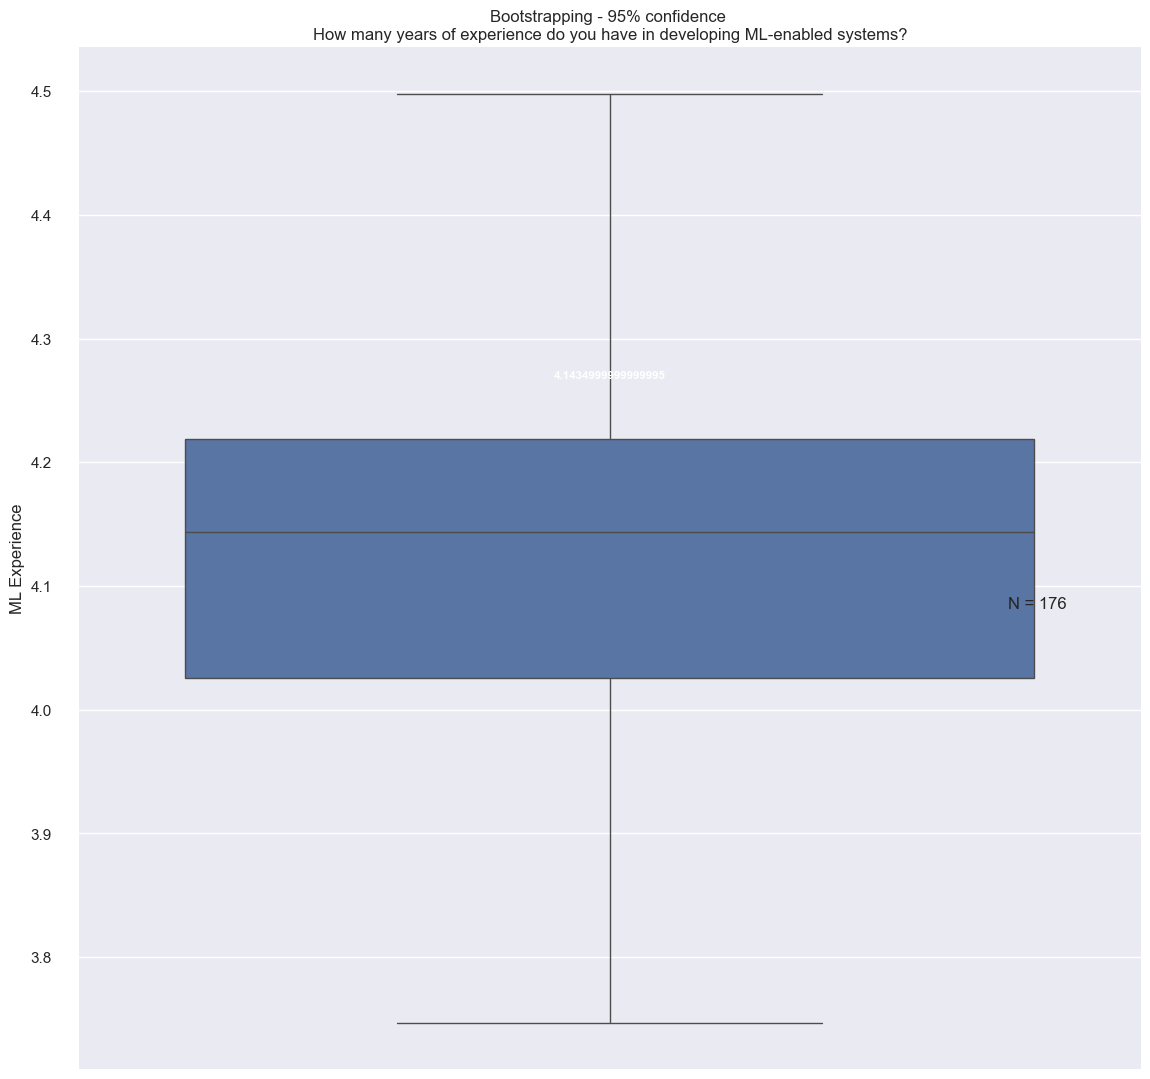

In [17]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D6_ML_Experience']))

d6_boot_plot.single_boxplot("ML Experience", outliers=False,
                            title="Bootstrapping - 95% confidence \nHow many years of experience do you have in developing ML-enabled systems?",
                            total_answers=total_answers)

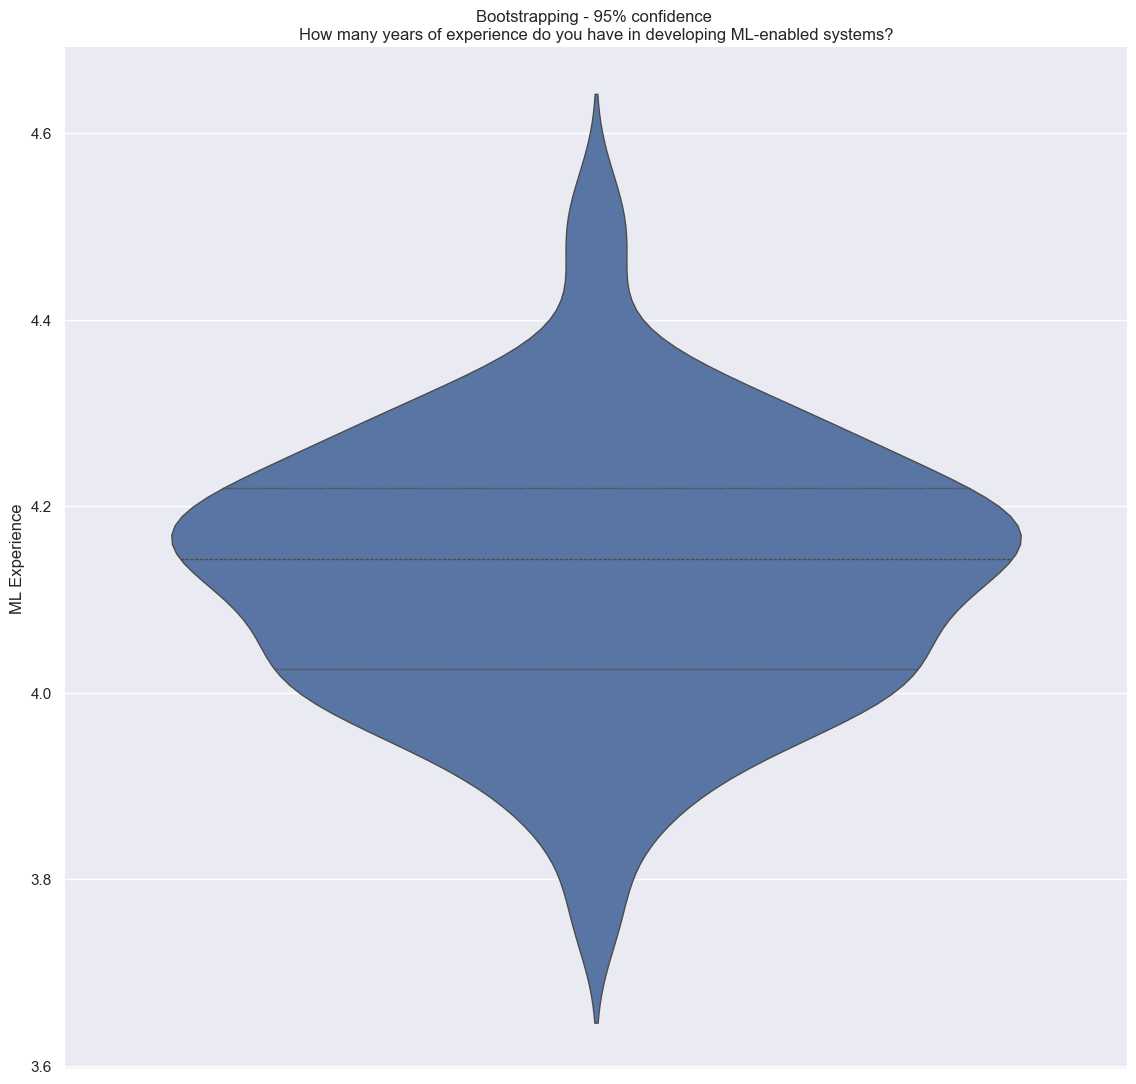

In [18]:
d6_boot_plot.single_violinplot("ML Experience",
                               title="Bootstrapping - 95% confidence \nHow many years of experience do you have in developing ML-enabled systems?")

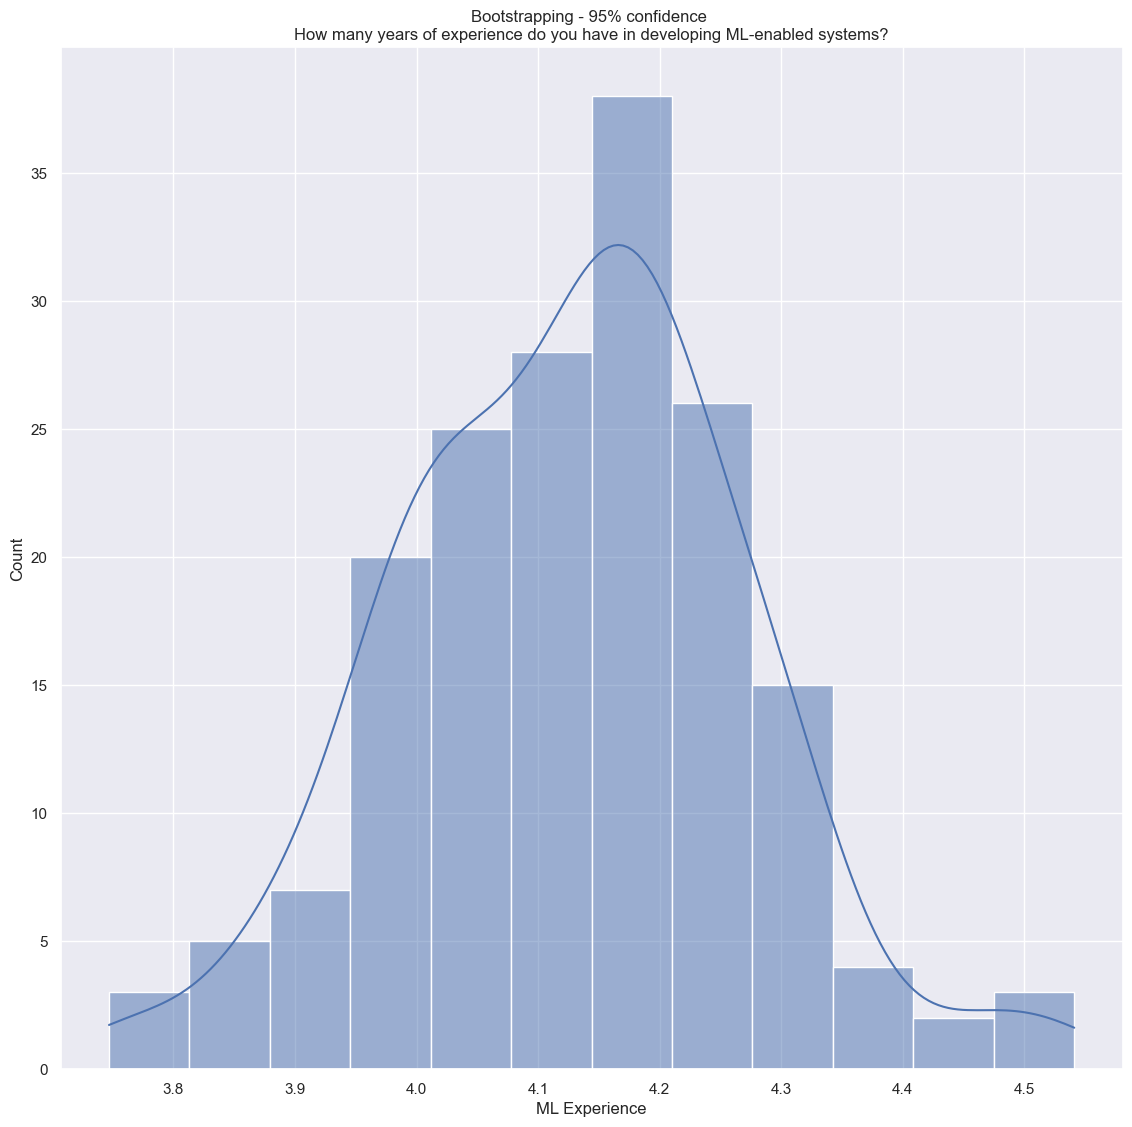

In [19]:
d6_boot_plot.single_histplot("ML Experience",
                             title="Bootstrapping - 95% confidence \nHow many years of experience do you have in developing ML-enabled systems?")

In [20]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
print(bootstrapped_list_data['confidence'])

Option: (Lower Value, Mean, Upper Value)
(4.106358931383182, 4.1274488636363635, 4.148538795889545)
